In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

(0.0, 25.0)

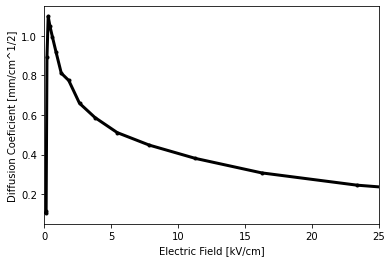

In [3]:
# Plot the diffusion generated from the magboltz file


# Electric field in V/cm
EField = np.array([100.0000, 143.8450, 206.9138, 297.6351, 428.1332, 615.8482, 885.8668, 1274.2750, 1832.9807, 2636.6509, 3792.6902, 5455.5948, 7847.5997, 11288.3789, 16237.7674, 23357.2147, 33598.1829, 48329.3024, 69519.2796, 100000.0000])

# Drift velocity [cm/ns]
v = np.array([0.00001058, 0.00001381, 0.00003807, 0.00007668, 0.00008692, 0.00009390, 0.00010117, 0.00010861, 0.00011768, 0.00012613, 0.00013763, 0.00014861, 0.00016336, 0.00018497, 0.00025613, 0.00037801, 0.00057706, 0.00082727, 0.00117157, 0.00165190])

# Diffusion Coeficient from Magboltz micron/sqrt(cm)
Dt = np.array([107, 114, 891, 1098, 1048, 993, 917, 811, 774, 659, 587, 511, 448, 381, 308, 246, 192, 156, 126, 101])

plt.figure()

plt.plot(EField/1000., Dt/1000., linewidth = 3, marker= ".", color = "black")
plt.xlabel("Electric Field [kV/cm]")
plt.ylabel("Diffusion Coeficient [mm/cm^1/2]")
plt.xlim(0, 25)


In [4]:
Mode = ["Aligned", "Alignedv2"]

data = pd.read_csv(f"../Files/{Mode[0]}/EventInfo_merge_{Mode[1]}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])
display(data)


,event,x,y,z,t
0,21,0.407,0.232,0.504,3285.91
1,21,0.415,0.234,0.491,3332.39
2,21,0.414,0.233,0.490,3335.14
3,21,0.413,0.232,0.489,3337.25
4,21,0.416,0.232,0.477,3403.79
...,...,...,...,...,...
41195516,20000,-0.097,-0.357,-0.517,7752.81
41195517,20000,-0.098,-0.358,-0.516,7756.96
41195518,20000,-0.099,-0.358,-0.515,7762.39
41195519,20000,-0.100,-0.358,-0.514,7764.45


In [5]:
print(min(data["z"].values))
print(max(data["z"].values))

-0.548
0.85


In [6]:
# Bin the z coordinates in steps of 0.1mm
# Bin the scatters in time
zmin=-0.6
zmax=0.9
zbw=0.01

zbins = np.arange(zmin, zmax+zbw, zbw)
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

print(zbins_centre)

data['z'] = pd.cut(x=data['z'], bins=zbins,labels=zbins_centre, include_lowest=True)
display(data)

[-0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585  0.595
  0.605  0.615  0.625  0.635  0.645  0.655  0.665  0.675  0.685  0.695
  0.705  0.715  0.725  0.735  0.745  0.755  0.765  0.775  0.785  0.795
  0.80

,event,x,y,z,t
0,21,0.407,0.232,0.505,3285.91
1,21,0.415,0.234,0.495,3332.39
2,21,0.414,0.233,0.485,3335.14
3,21,0.413,0.232,0.485,3337.25
4,21,0.416,0.232,0.475,3403.79
...,...,...,...,...,...
41195516,20000,-0.097,-0.357,-0.515,7752.81
41195517,20000,-0.098,-0.358,-0.515,7756.96
41195518,20000,-0.099,-0.358,-0.515,7762.39
41195519,20000,-0.100,-0.358,-0.515,7764.45


In [7]:
# Get all values where z = 0.305 and z = -0.305
data_cut = data[ (data["z"] == 0.3050000000000008) | (data["z"] == -0.3049999999999997)  ]
data_cut = data_cut.drop_duplicates(subset=["z", "event"])
data_cut = data_cut.astype(float)
display(data_cut)

,event,x,y,z,t
165,21.0,0.380,0.226,0.305,3961.67
871,21.0,0.381,0.188,-0.305,5949.55
1195,22.0,-0.126,0.204,0.305,4137.62
1895,22.0,-0.126,0.202,-0.305,6151.86
2207,23.0,0.361,0.215,0.305,4741.09
...,...,...,...,...,...
41193291,19998.0,-0.118,0.231,-0.305,6151.97
41193622,19999.0,-0.014,-0.447,0.305,4054.98
41194313,19999.0,-0.024,-0.490,-0.305,6074.79
41194654,20000.0,-0.007,-0.462,0.305,4086.63


In [8]:
data_min = data_cut[data_cut["z"] == 0.3050000000000008 ]
data_max = data_cut[data_cut["z"] == -0.3049999999999997 ]

data_min.reset_index(inplace=True)
data_max.reset_index(inplace=True)

data_diff = pd.DataFrame()
data_diff["event"] = data_max["event"]
data_diff["x"] = data_max["x"].subtract(data_min["x"])*10
data_diff["y"] = data_max["y"].subtract(data_min["y"])*10
data_diff["t"] = data_max["t"].sub(data_min["t"])/1000.

data_diff["D"] = data_diff["y"]*data_diff["y"] / (2.0 * data_diff["t"])

display(data_diff)

,event,x,y,t,D
0,21.0,0.01,-0.38,1.98788,0.036320
1,22.0,0.00,-0.02,2.01424,0.000099
2,23.0,0.16,-0.09,2.02124,0.002004
3,24.0,-0.06,0.02,2.02669,0.000099
4,25.0,0.21,-0.39,1.98888,0.038238
...,...,...,...,...,...
39915,19996.0,-0.38,0.14,2.04227,0.004799
39916,19997.0,-0.16,-0.13,2.04040,0.004141
39917,19998.0,0.14,-0.16,2.03534,0.006289
39918,19999.0,-0.10,-0.43,2.01981,0.045772


(array([1.9491e+04, 6.3530e+03, 3.8880e+03, 2.6360e+03, 1.8970e+03,
        1.3210e+03, 1.0090e+03, 7.4400e+02, 6.2300e+02, 4.3400e+02,
        3.3300e+02, 2.5700e+02, 1.9400e+02, 1.7200e+02, 1.2800e+02,
        1.0300e+02, 7.9000e+01, 6.2000e+01, 3.6000e+01, 3.4000e+01,
        3.1000e+01, 2.2000e+01, 1.2000e+01, 1.2000e+01, 7.0000e+00,
        7.0000e+00, 1.1000e+01, 2.0000e+00, 4.0000e+00, 3.0000e+00,
        3.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.00516723, 0.01033446, 0.01550168, 0.02066891,
        0.02583614, 0.03100337, 0.0361706 , 0.04133783, 0.04650505,
        0.05167228, 0.05683951, 0.06200674, 0.06717397, 0.0723412 ,
        0.07750842, 0.08267565, 0.08784288, 0.09301011, 0.09817734,
        0.10334457, 0.10851179, 0.11367902, 0.11884625, 0.12401348,
        0.12918071, 0.13434793, 0.13951516, 0.14468239, 0.14984962,
        0.15501685, 0.16018408, 0.1653513 , 0.

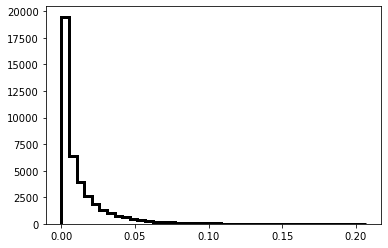

In [9]:
plt.figure()
plt.hist(data_diff["D"],bins = 40 ,histtype="step", color = "black", linewidth=3)
